<a href="https://colab.research.google.com/github/CarmoDuds/SageManifolds/blob/master/GW170817.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gwpy

import gwpy

from gwosc.datasets import event_gps
from gwpy.timeseries import TimeSeries
from scipy.signal import get_window

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.7/295.7 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.6/128.6 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 18.1 MB/s eta 0:00:00
  Attempting uninstall: cryptography
    Found existing installation: cryptography 43.0.3
    Uninstalling cryptography-43.0.3:
      Successfully uninstalled cryptography-43.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pydrive2 1.21.3 requires cryptography<44, but you have cryptography 45.0.4 which is incompatible.
pyopenssl 24.2.1 requires cryptography<44,>=41.0.5, but you have cryptography 45.0.4 which is incompatible.


# Data Import

Importa as séries temporais dos três interferômetros em um intervalo de tempo definido em torno do evento GW170817.

In [ ]:
# Encontrar tempo GPS de um evento específico (tempo em segundos, onde o 0 do tempo GPS em 00:00 de 6 de janeiro de 1980)

gps = event_gps('GW170817')
print(gps)

1187008882.4


In [ ]:
Ldata = TimeSeries.fetch_open_data('L1', int(gps) - 512, int(gps)+512, verbose=True) # Dados do LIGO - Livingston
Hdata = TimeSeries.fetch_open_data('H1', int(gps) - 512, int(gps)+512, verbose=True) # LIGO - Hanford
Vdata = TimeSeries.fetch_open_data('V1', int(gps) - 512, int(gps)+512, verbose=True) # VIRGO

Fetched 1 URLs from gwosc.org for [1187008370 .. 1187009394))
Reading data... [Done]
Fetched 1 URLs from gwosc.org for [1187008370 .. 1187009394))
Reading data... [Done]
Fetched 1 URLs from gwosc.org for [1187008370 .. 1187009394))
Reading data... [Done]


# Plot Strain Adimensional

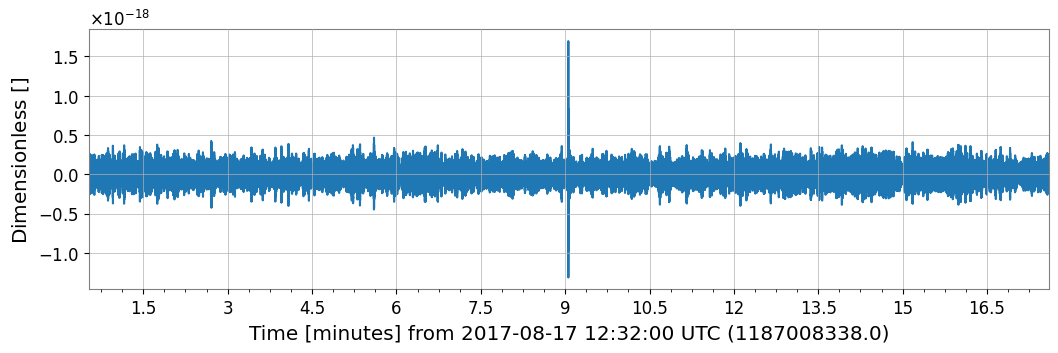

In [ ]:
# LIGO Livingston

plot = Ldata.plot()
plot.show()

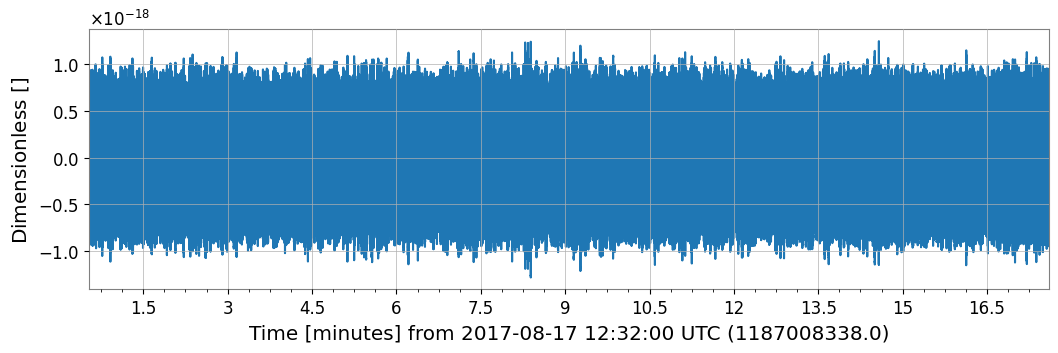

In [ ]:
# LIGO Hanford

plot = Hdata.plot()
plot.show()

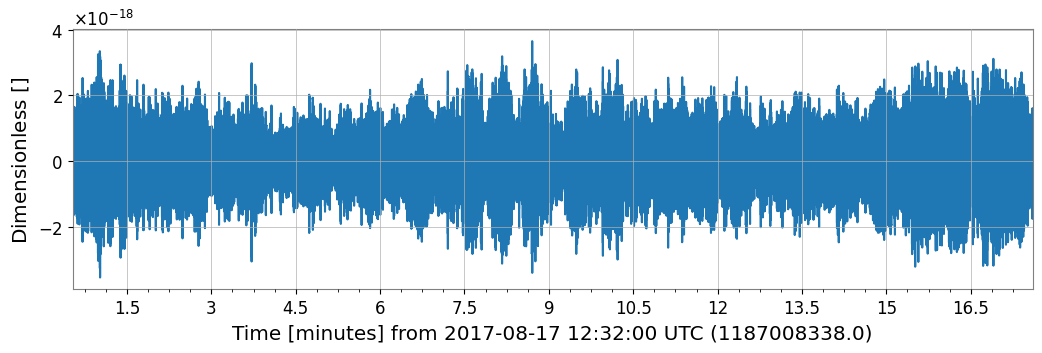

In [ ]:
# Virgo

plot = Vdata.plot()
plot.show()

# Fast Fourier Transform

In [ ]:
Lfft = Ldata.fft() # LIGO - Livingston
Hfft = Hdata.fft() # LIGO - Hanford
Vfft = Vdata.fft() # Virgo

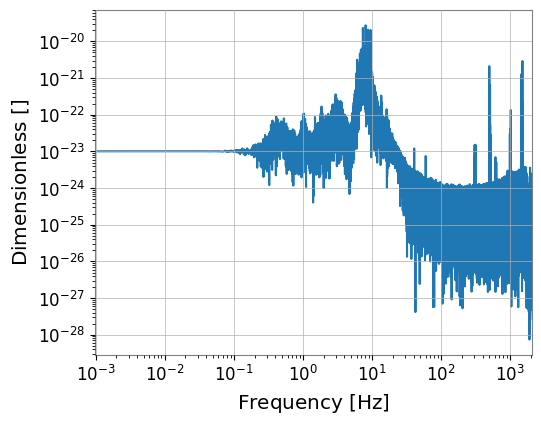

In [ ]:
plot = Lfft.abs().plot(xscale="log", yscale="log")
plot.show()

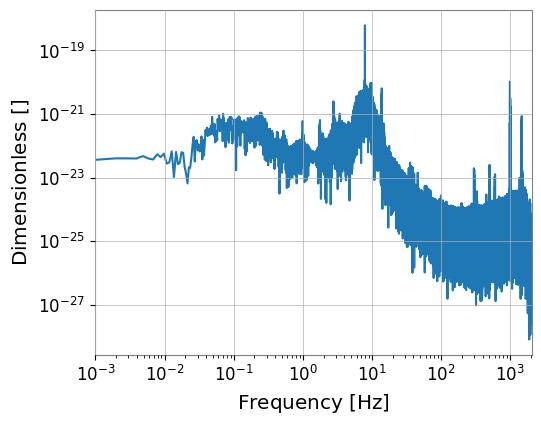

In [ ]:
plot = Hfft.abs().plot(xscale="log", yscale="log")
plot.show()

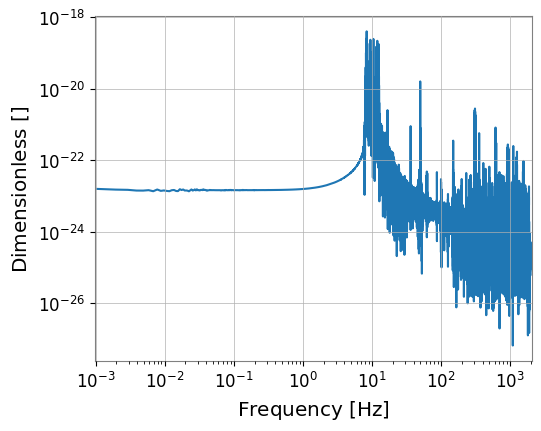

In [ ]:
plot = Vfft.abs().plot(xscale="log", yscale="log")
plot.show()

# Hann Window continuar

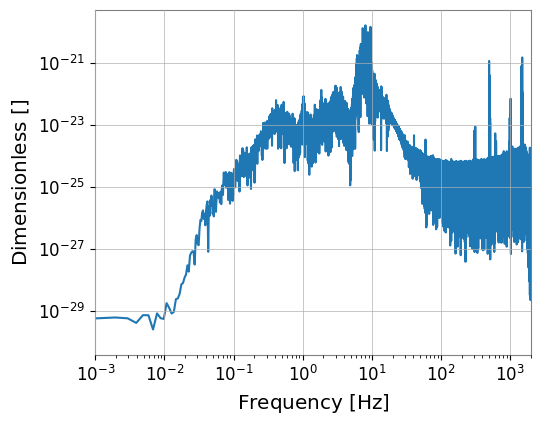

In [ ]:
# Aplicar janela de Hann nos dados
window = get_window("hann" , Ldata.size)
LHann = Ldata*window

fftHann = LHann.fft().abs()

plotfftHann = fftHann.abs().plot(xscale="log", yscale="log")
plotfftHann.show()

# ASD

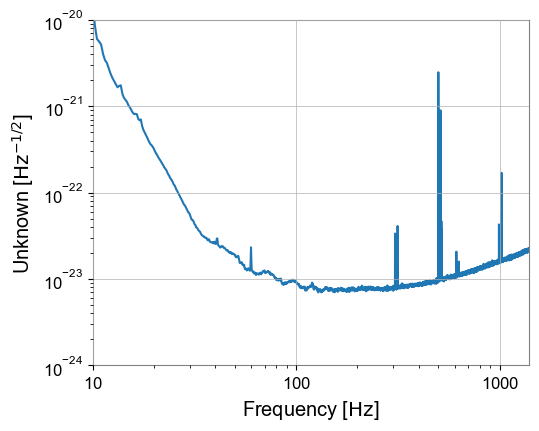

In [ ]:
# ASD (Amplitude Spectral Density)
Lasd = Ldata.asd(fftlength=4, method="welch") #existe o metodo median tambem
plotasd = Lasd.plot()
ax = plotasd.gca()
ax.set(xlim =(10, 1400), ylim=(1e-24, 1e-20)) # Por que esse range em y?
plotasd.show(warn=False)

Fetched 1 URLs from gwosc.org for [1187008370 .. 1187009394))
Reading data... [Done]
Fetched 1 URLs from gwosc.org for [1187008370 .. 1187009394))
Reading data... [Done]


In [ ]:
Hasd = Hdata.asd(fftlength=4, method="welch")
Vasd = Vdata.asd(fftlength=4, method="welch")

ax.plot(Hasd, label="LIGO - Hanford", color= "gwpy:ligo-hanford")
ax.plot(Lasd, label="VIRGO", color= "gwpy:virgo")

lline = ax.lines[0]
lline.set_color("gwpy:ligo-livingston")
lline.set_label("LIGO - Livingston")

ax.set_ylabel(r"Strain Noise")
ax.legend()

plotasd.show()